# Kaggle Titanic Competition Using Logistic Regression

Dataset: https://www.kaggle.com/c/titanic

In [1]:
#import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#import dataset 
dataset = pd.read_csv("data/train.csv")

#### Explore Dataset :

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Visualizations :

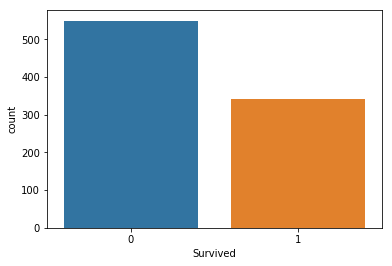

In [6]:
#Number of survived 
sns.countplot(x='Survived',data=dataset)

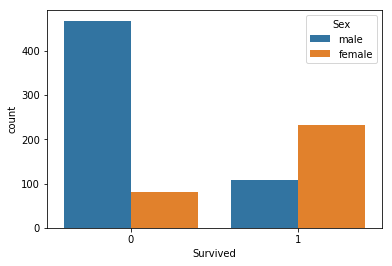

In [7]:
#Number of people that survived based on sex
sns.countplot(x='Survived',hue='Sex',data=dataset)

It is visible from the stacked barchart that more women survived than men.

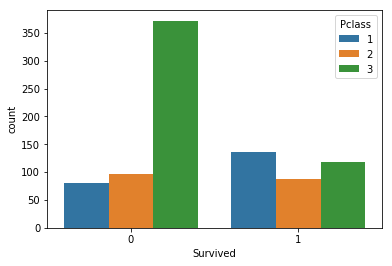

In [8]:
#Number of Survived based on passenger class
sns.countplot(x='Survived',hue='Pclass',data=dataset)

From the chat we see that we have more 3rd class passenger deaths and more 1st class survived

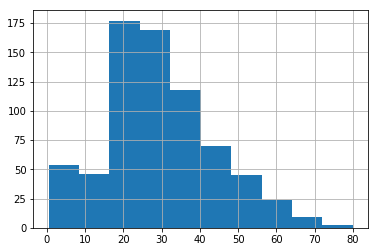

In [9]:
#Age distribution 
dataset.Age.hist()

#### Data Wrangling :

In [10]:
#We check for NAN values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

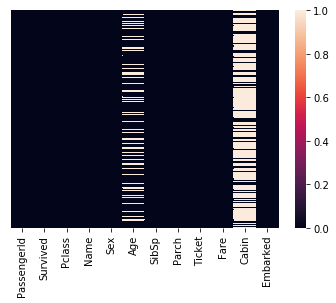

In [11]:
#Plot missing value using heatmap 
sns.heatmap(dataset.isnull(),yticklabels=False)

We have a high percentage of age with missing values so we would so some manipulations.

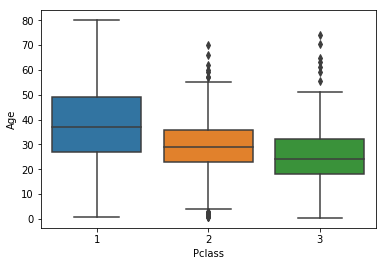

In [12]:
#Age manipulation

#Plot
sns.boxplot(x='Pclass',y='Age',data=dataset)

It is obvious from the box plot, people with more money are older and thus are in first class and people with less money and younger are in second and third class respectively.

In [13]:
#We perform a groupy and find the average age of people in each class
dataset.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
#Create a function to fill non available figures in Age
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if (pd.isnull(Age)):
        if (Pclass == 1):
            return 38
        elif (Pclass == 2):
            return 29
        else:
            return 25
    else: 
        return Age


In [15]:
dataset['Age'] = dataset[['Age','Pclass']].apply(inpute_age,axis=1)

In [16]:
#We drop cabin from the dataframe because it has too many missing values and we wouldnt be needing it.
dataset.drop('Cabin',axis=1,inplace=True)

In [17]:
#Check
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#For embarked which has just two missing values, we drop them off
dataset.dropna(inplace=True)

In [19]:
#Perform check
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
#We transform data further by getting dummies for string values
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embarked = pd.get_dummies(dataset['Embarked'],drop_first=True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
pclass = pd.get_dummies(dataset['Pclass'],drop_first=True)
pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [23]:
dataset = pd.concat([dataset,sex,embarked,pclass],axis=1)

In [24]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [25]:
#Drop Non-feature columns
dataset=dataset.drop(['Name','Sex','PassengerId','Pclass','Ticket','Embarked'],axis=1)

In [38]:
#Train Model
X = dataset.drop('Survived',axis=1)
y = dataset['Survived']
from sklearn.cross_validation import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
#Fitting model
from sklearn.linear_model import LogisticRegression

In [29]:
logRg = LogisticRegression()

In [30]:
logRg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
yPred = logRg.predict(X_test)

#### Model Evaluation :

In [32]:
#Classification Report
from sklearn.metrics import classification_report as c_r

In [33]:
c_r(y_test,yPred)

'             precision    recall  f1-score   support\n\n          0       0.84      0.89      0.86       184\n          1       0.80      0.71      0.75       110\n\navg / total       0.82      0.82      0.82       294\n'

In [34]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix as c_m

In [35]:
c_m(y_test,yPred)

array([[164,  20],
       [ 32,  78]], dtype=int64)

In [36]:
#Accuracy Score
from sklearn.metrics import accuracy_score as a_s

In [37]:
a_s(y_test,yPred)

0.8231292517006803

Note: Given the result from the following metrics, it is fair to say our result did good.